In [1]:
import rdkit

In [2]:
from naglmbis.models import load_charge_model
# load two pre-trained charge models
charge_model = load_charge_model(charge_model="nagl-v1-mbis")
# load a model trained to scf dipole and mbis charges
charge_model_2 = load_charge_model(charge_model="nagl-v1-mbis-dipole")


In [3]:
from openff.toolkit.topology import Molecule

# create ethanol
ethanol = Molecule.from_smiles("CCO")
# predict the charges (in e) and atomic volumes in (bohr ^3)
charges = charge_model.compute_properties(ethanol.to_rdkit())["mbis-charges"]
charges_2 = charge_model_2.compute_properties(ethanol.to_rdkit())["mbis-charges"]

In [4]:
charges.flatten().tolist()


[-0.41209813952445984,
 0.23634019494056702,
 -0.6952458024024963,
 0.12052258104085922,
 0.12052258104085922,
 0.12052258104085922,
 0.02848917990922928,
 0.02848917990922928,
 0.45245763659477234]

In [5]:
charges_2.flatten().tolist()

[-0.4306110441684723,
 0.23793305456638336,
 -0.6360558271408081,
 0.12468185275793076,
 0.12468185275793076,
 0.12468185275793076,
 0.026178915053606033,
 0.026178915053606033,
 0.4023304581642151]

In [6]:
mol = '\n     RDKit          2D\n\n  3  2  0  0  0  0  0  0  0  0999 V2000\n   -0.7890   -0.1982   -0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.0061    0.3917   -0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7951   -0.1936    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0\n  1  2  1  0\n  2  3  1  0\nM  END\n'
rdkit_conformer = rdkit.Chem.rdmolfiles.MolFromMolBlock(mol, removeHs = False)
print(rdkit_conformer)
print(rdkit_conformer.GetAtoms())
print(rdkit_conformer.GetRingInfo())
water = Molecule.from_smiles("[H]O[H]")
waterrd = water.to_rdkit()
print(rdkit.Chem.rdmolfiles.MolToMolBlock(rdkit_conformer))
print(rdkit.Chem.rdmolfiles.MolToMolBlock(waterrd))

charges = charge_model.compute_properties(rdkit_conformer)["mbis-charges"]
print(charges)



     RDKit          2D

  3  2  0  0  0  0  0  0  0  0999 V2000
   -0.7890   -0.1982   -0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0061    0.3917   -0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7951   -0.1936    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
M  END


     RDKit          2D

  3  2  0  0  0  0  0  0  0  0999 V2000
    1.2990    0.7500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990    0.7500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
M  END

tensor([[ 0.4148],
        [-0.8296],
        [ 0.4148]], grad_fn=<CatBackward0>)


In [43]:
charge_model.compute_properties(rdkit_conformer)

{'mbis-charges': tensor([[ 0.4148],
         [-0.8296],
         [ 0.4148]], grad_fn=<CatBackward0>)}

In [32]:
dgl_mol = charge_model.return_dgl_molecule(rdkit_conformer)
dgl_mol.graph.ndata

{'feat': tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.]]), 'formal_charge': tensor([0, 0, 0], dtype=torch.int8), 'atomic_number': tensor([1, 8, 1], dtype=torch.uint8)}

In [37]:
charge_model.forward(dgl_mol)
dgl_mol.graph.ndata['h']


tensor([[ 14.3275, 121.8238,  17.4015,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,  26.7725, 132.2623,   0.0000,   0.0000,   0.0000,
          23.6916,   0.0000,   0.0000,   0.0000,   0.0000,  28.2107,   0.0000,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  46.5262,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  56.8067,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   0.0000,   9.1129,   0.0000,   0.0000,   0.0000,   0.0000,
          60.9820,  26.2067,   0.0000,   0.0000,   0.0000,  99.1534,  47.9523,
           0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,  17.7970,   0.0000,  24.4694, 169.3066,   0.0000,  26.4045,
           0.0000,   0.0000,   0.0000,   0.0000,   0

In [69]:
test_mol  = Molecule.from_smiles('COC1=CC(CN2CC(C2)NC(CNC3=NN(C4=C3C=C(C(F)(F)F)C=C4)C)=O)=CC=C1')
test_molrd = test_mol.to_rdkit()
dgl_mol_2 = charge_model.return_dgl_molecule(test_molrd)
charge_model.forward(dgl_mol_2)
dgl_mol_2.graph.ndata['h']

tensor([[131.3404,  82.5788,  55.9637,  ...,   8.8287,  61.6365,   0.0000],
        [169.3238,   0.0000,  72.8057,  ...,  11.5660,  36.8504,   0.0000],
        [ 48.7949,  32.9465,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        ...,
        [ 73.1885,  30.8973,  33.0427,  ...,   0.0000,  20.6325,   0.0000],
        [ 70.6255,  20.4643,  22.0627,  ...,   0.0000,  20.9518,   0.0000],
        [ 67.8129,  29.9475,  31.2922,  ...,   0.0000,  20.3004,   0.0000]],
       grad_fn=<ReluBackward0>)

In [71]:
import torch
from rdkit import Chem

latent_embeddings = dgl_mol_2.graph.ndata['h']


# Create a dictionary to track unique embeddings and labels
unique_embeddings = {}
atom_labels = {}

for i, atom in enumerate(test_molrd.GetAtoms()):
    atom_type = atom.GetSymbol()  # Get the atom type (C, N, O, etc.)
    embedding = latent_embeddings[i].unsqueeze(0)  # Get the embedding for the atom

    # Check if this atom type has been encountered before
    if atom_type not in unique_embeddings:
        unique_embeddings[atom_type] = [embedding]
        atom_labels[i] = f"{atom_type}1"
    else:
        # Compare with existing embeddings for this atom type
        is_unique = True
        for j, unique_embedding in enumerate(unique_embeddings[atom_type]):
            if torch.all(torch.isclose(embedding, unique_embedding, atol=1e-5)):
                atom_labels[i] = f"{atom_type}{j+1}"
                # atom.SetProp("atomLabel", f"{atom_type}{j+1}")
                is_unique = False
                break
        
        if is_unique:
            unique_embeddings[atom_type].append(embedding)
            atom_labels[i] = f"{atom_type}{len(unique_embeddings[atom_type])}"
            # atom.SetProp("atomLabel", f"{atom_type}{len(unique_embeddings[atom_type])}")
    # Set the atom label property
    atom.SetProp("atomLabel", atom_labels[i])

In [72]:
atom_labels

{0: 'C1',
 1: 'O1',
 2: 'C2',
 3: 'C3',
 4: 'C4',
 5: 'C5',
 6: 'N1',
 7: 'C6',
 8: 'C7',
 9: 'C6',
 10: 'N2',
 11: 'C8',
 12: 'C9',
 13: 'N3',
 14: 'C10',
 15: 'N4',
 16: 'N5',
 17: 'C11',
 18: 'C12',
 19: 'C13',
 20: 'C14',
 21: 'C15',
 22: 'F1',
 23: 'F1',
 24: 'F1',
 25: 'C16',
 26: 'C17',
 27: 'C18',
 28: 'O2',
 29: 'C19',
 30: 'C20',
 31: 'C21',
 32: 'H1',
 33: 'H1',
 34: 'H1',
 35: 'H2',
 36: 'H3',
 37: 'H3',
 38: 'H4',
 39: 'H4',
 40: 'H5',
 41: 'H4',
 42: 'H4',
 43: 'H6',
 44: 'H7',
 45: 'H7',
 46: 'H8',
 47: 'H9',
 48: 'H10',
 49: 'H11',
 50: 'H12',
 51: 'H12',
 52: 'H12',
 53: 'H13',
 54: 'H14',
 55: 'H15'}

In [73]:
unique_embeddings

{'C': [tensor([[1.3134e+02, 8.2579e+01, 5.5964e+01, 3.3431e+01, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 6.1722e+01, 5.8006e+01, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.3287e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 4.3351e+01, 4.7770e+01, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.0509e+01, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 4.9388e+01, 8.9005e+00, 6.2021e+01,
           7.4140e+00, 4.9378e+01, 6.5881e+01, 0.0000e+00, 0.0000e+00, 4.0371e+01,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           1.6300e+00, 0.0000e+00, 0.0000e+00, 3.7183e+00, 2.8113e+01, 5.6029e+01,
           0.0000e+00, 0.0000e+00, 6.9418e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 7.3798e+01, 0.0000e+00, 0.0000e+00,
           7.6494e+01, 3.2360e+01, 0.0000e+00, 1.3415e+02, 6.3176e+01, 0.0000e+00,

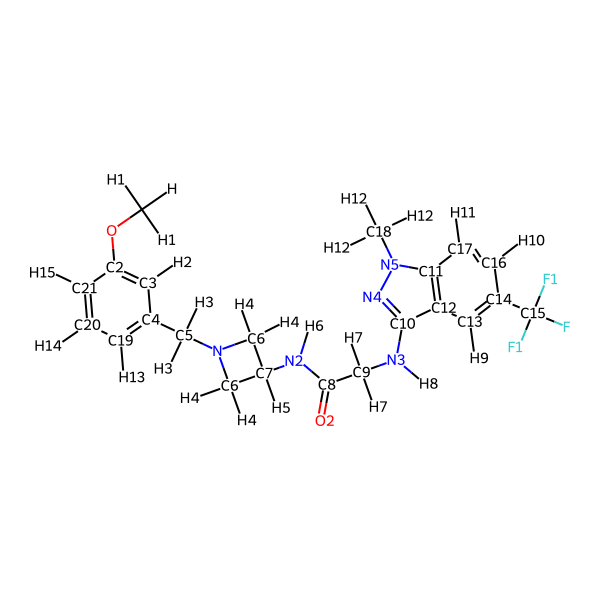

In [74]:
def molecule_with_labels(mol, labels):
    # Create a copy of the molecule
    mol = Chem.Mol(mol)
    # Create a new drawing options object
    drawing_options = Draw.DrawingOptions()
    # Exclude hydrogens
    drawing_options.includeAtomNumbers = False
    # Create an empty dictionary for atom indices and their custom labels
 

    # Return the molecule image with custom labels
    return Draw.MolToImage(mol, size=(600, 600), kekulize=True, options=drawing_options, legend=None, highlightAtoms=None, highlightBonds=None, highlightAtomColors=None, highlightBondColors=None, highlightAtomRadii=None)

# Generate and display the molecule with labels
image = molecule_with_labels(test_molrd, atom_labels)
image

In [ ]:
import re


atom_types = {}
for atom, tensor in zip(test_molrd.GetAtoms(),dgl_mol_2.graph.ndata['h']):

    #see if atom exists
    try:
        atom_types[atom.GetSymbol()] 
    except KeyError:
        
        # atom_types[atom.GetSymbol()+'1'] = tensor
    


In [16]:
charge_model.compute_properties(rdkit_conformer)

{'mbis-charges': tensor([[ 0.4148],
         [-0.8296],
         [ 0.4148]], grad_fn=<CatBackward0>)}

In [29]:
foo = {
    'a':    1,
    'b':    2,
    'c':    3,
    }

for items in foo.items():
    print(items[1])
    foo[items[0]] = 'b'

1
2
3


In [54]:
[foo[key] for key in ['a','b']]

['b', 'b']

In [38]:
import json
import os
file_name = "test.json"
with open(file_name,"w") as outfile:
    json.dump(foo, outfile, indent=2)
    print(os.path.abspath(file_name))


/Users/localadmin/Documents/projects/nagl-mbis/test.json


In [44]:
from rdkit import Chem

mol_file = '/Users/localadmin/Documents/projects/molevaluate/tests/data/saq.sdf'
molevaluate_example = Chem.SDMolSupplier(mol_file)
print(molevaluate_example[0])

charges = charge_model.compute_properties(molevaluate_example[0])['mbis-charges']
charges = charges.flatten().tolist()
print(charges)
# molevaluate_openff = Molecule.from_rdkit(molevaluate_example[0])
# molevaluate_openff.assign_partial_charges('am1bcc')
# molevaluate_openff.partial_charges

[-0.19048011302947998, 0.0845298022031784, 0.26665380597114563, 0.8065629005432129, -0.7227752208709717, -0.7719027400016785, 0.7308328747749329, -0.35081833600997925, -0.350818395614624, -0.35081833600997925, -0.12038686871528625, 0.11701706796884537, 0.2069305032491684, -0.05823797732591629, 0.6524993181228638, -0.4033324420452118, -0.2333332896232605, -0.060229986906051636, 0.06844428926706314, 0.14812833070755005, 0.017365820705890656, 0.008581675589084625, 0.04318928346037865, 0.008581675589084625, 0.017365820705890656, 0.9407612681388855, -0.5906707048416138, -0.619259238243103, 0.23959247767925262, 0.6557778120040894, -0.4202439486980438, -0.30426764488220215, 0.24175868928432465, -0.02313297614455223, -0.0162445530295372, -0.013178348541259766, 0.007660195231437683, -0.02330682799220085, 0.30678310990333557, -0.029724828898906708, 0.2141391932964325, -0.3046450614929199, 0.2196604162454605, -0.0865010991692543, 0.04149263724684715]
